# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_select = df[["trans_date_trans_time","category","amt","city_pop","is_fraud"]]
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df["trans_date_trans_time"]]
dummies = pd.get_dummies(df_select["category"])
X = pd.concat([dummies,df_select[["amt","city_pop","time_var"]]],axis =1)
y = df_select["is_fraud"]

<ipython-input-6-eefeb305c4ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df["trans_date_trans_time"]]


In [11]:
X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,25
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,33
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,53
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,15
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,17


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split

In [9]:
X_trian,X_test,y_trian,y_test = train_test_split(X,y,test_size=.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [15]:
ros = RandomOverSampler(random_state=0)
over_X,over_y = ros.fit_resample(X,y)

In [16]:
runs = RandomUnderSampler(random_state=0)
under_X,under_y = runs.fit_resample(X,y)

In [17]:
oversample = SMOTE()
SMOTE_X,SMOTE_y = oversample.fit_resample(X,y)

# 3.) Train three logistic regression models 

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg_over = LogisticRegression().fit(over_X,over_y)
log_reg_under = LogisticRegression().fit(under_X,under_y)
log_reg_SMOTE = LogisticRegression().fit(SMOTE_X,SMOTE_y)

# 4.) Test the three models

In [21]:
from sklearn import metrics

In [34]:
predict_over_1 = log_reg_over.predict(np.array(over_X))
MSE_over_1 = metrics.mean_squared_error(over_y, predict_over_1)
print("MSE of Oversample is",MSE_over_1)

MSE of Oversample is 0.21491255008363833


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
predict_under_1 = log_reg_under.predict(np.array(under_X))
MSE_under_1 = metrics.mean_squared_error(under_y, predict_under_1)
print("MSE of Undersample is",MSE_under_1)

MSE of Undersample is 0.21515151515151515


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
predict_SMOTE_1 = log_reg_SMOTE.predict(np.array(SMOTE_X))
MSE_SMOTE_1 = metrics.mean_squared_error(SMOTE_y, predict_SMOTE_1)
print("MSE of SMOTE is",MSE_SMOTE_1)

MSE of SMOTE is 0.21213062752224635


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# 5.) Which performed best in Out of Sample metrics?

In [40]:
predict_over_2 = log_reg_over.predict(np.array(X_test))
MSE_over_2 = metrics.mean_squared_error(y_test, predict_over_2)

print("MSE of Oversample is",MSE_over_2)

MSE of Oversample is 0.18601693898606012


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
predict_under_2 = log_reg_under.predict(np.array(X_test))
MSE_under_2 = metrics.mean_squared_error(y_test, predict_under_2)
print("MSE of Undersample is",MSE_under_2)


MSE of Undersample is 0.18363564384942058


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
predict_SMOTE_2 = log_reg_SMOTE.predict(np.array(X_test))
MSE_SMOTE_2 = metrics.mean_squared_error(y_test, predict_SMOTE_2)
print("MSE of SMOTE is",MSE_SMOTE_2)

MSE of SMOTE is 0.17958684229468078


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


We can find that the SMOTE performed best in Out of Sample metrics with the smallest MSE.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [55]:
X_trian,X_test,y_trian,y_test = train_test_split(X,y,test_size=.3)

In [59]:
raw_temp = pd.concat([X_trian,y_trian],axis = 1)
raw_temp.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var,is_fraud
259122,0,0,0,0,0,0,0,1,0,0,0,0,0,0,37.99,1087,37,0
435580,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11.52,1766,14,0
88017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,16.11,5760,49,0
512891,0,0,0,0,1,0,0,0,0,0,0,0,0,0,83.52,776,23,0
325043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22.35,2661,22,0


In [62]:
raw_temp[raw_temp["is_fraud"] == 1]["amt"]
raw_temp[raw_temp["is_fraud"] == 1]["city_pop"]

85764      42817
36108       6263
497523    601723
213745       722
341816     92294
           ...  
401559      7430
192598     15426
45851      12335
36461       8333
96153       1606
Name: city_pop, Length: 1494, dtype: int64

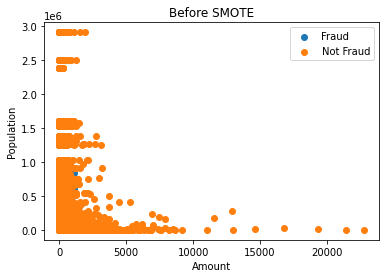

In [64]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"],raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"],raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
plt.legend(["Fraud","Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.title("Before SMOTE")
plt.show()

In [65]:
new_temp = pd.concat([SMOTE_X,SMOTE_y],axis = 1)
new_temp.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var,is_fraud
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,25,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,33,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,53,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,15,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,17,0


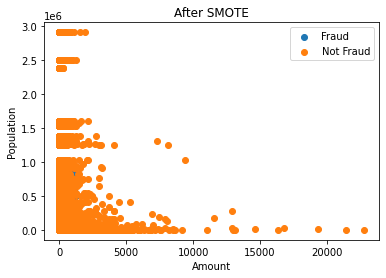

In [66]:
plt.scatter(new_temp[new_temp["is_fraud"] == 1]["amt"],new_temp[new_temp["is_fraud"] == 1]["city_pop"])
plt.scatter(new_temp[new_temp["is_fraud"] == 0]["amt"],new_temp[new_temp["is_fraud"] == 0]["city_pop"])
plt.legend(["Fraud","Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.title("After SMOTE")
plt.show()